In [1]:
import joblib 

In [2]:
vars = joblib.load('my_variables.pkl')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Model Implementation and Visualization

In [4]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt="g", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix', color='orange', fontsize=16)
    plt.show()

def LR_model(x_train, x_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)

    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    
    print("Classification Report for Training Set:\n")
    print(classification_report(y_train, train_predictions))
    
    print(f"Accuracy Score for Training Set: {train_accuracy}\n")
    
    print(f"ROC AUC Score for Training Set: {train_roc_auc}\n")

    print("Confusion Matrix for Training Set:\n")
    cm_train = confusion_matrix(y_train, train_predictions)
    plot_confusion_matrix(cm_train, labels=['Non-Fraud', 'Fraud'])
    
    print("\nClassification Report for Test Set:\n")
    print(classification_report(y_test, test_predictions))
    
    print(f"Accuracy Score for Test Set: {test_accuracy}\n")
    
    print(f"ROC AUC Score for Test Set: {test_roc_auc}\n")
    
    print("Confusion Matrix for Test Set:")
    cm_test = confusion_matrix(y_test, test_predictions)
    plot_confusion_matrix(cm_test, labels=['Non-Fraud', 'Fraud'])

# Model Cross Validation

In [5]:
def cross_val(x, y):
    
    lr = LogisticRegression()

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {'roc_auc': 'roc_auc', 
               'f1': 'f1',
               'accuracy': 'accuracy'}

    cv_results = cross_validate(lr, x, y, cv=skf, scoring=scoring)

    for i in range(skf.get_n_splits()):
        print(f"Fold {i+1}: ROC AUC: {cv_results['test_roc_auc'][i]}, F1 Score: {cv_results['test_f1'][i]}, Accuracy: {cv_results['test_accuracy'][i]}")

    mean_roc_auc = cv_results['test_roc_auc'].mean()
    mean_f1 = cv_results['test_f1'].mean()
    mean_accuracy = cv_results['test_accuracy'].mean()

    print("\nMean ROC AUC:", mean_roc_auc)
    print("Mean F1 Score:", mean_f1)
    print("Mean Accuracy:", mean_accuracy)

# Model Performance After Feature Scaling

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.63      0.73       394

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy Score for Training Set: 0.9992143781957032

ROC AUC Score for Training Set: 0.9801025141868567

Confusion Matrix for Training Set:



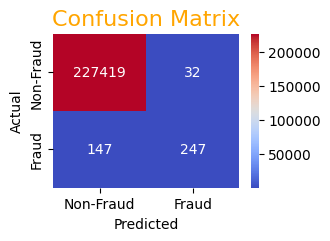


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.9991222218320986

ROC AUC Score for Test Set: 0.9762150006316539

Confusion Matrix for Test Set:


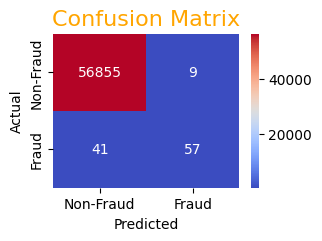

In [7]:
LR_model(vars['x_train'], vars['x_test'], vars['y_train'], vars['y_test'])

# Model Performance After Feature Transformation

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.65      0.75       394

    accuracy                           1.00    227845
   macro avg       0.94      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy Score for Training Set: 0.9992538787333495

ROC AUC Score for Training Set: 0.980909281358687

Confusion Matrix for Training Set:



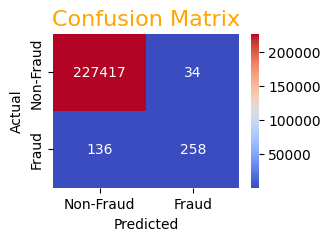


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.63      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.9992099996488887

ROC AUC Score for Test Set: 0.9776634978696037

Confusion Matrix for Test Set:


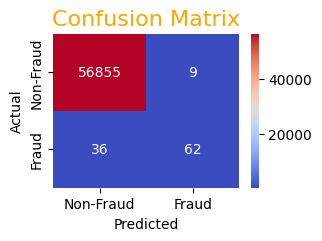

In [8]:
LR_model(vars['x_train_pt'], vars['x_test_pt'], vars['y_train'], vars['y_test'])

# Model Performance After Implementing LDA

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.87      0.55      0.67       394

    accuracy                           1.00    227845
   macro avg       0.94      0.77      0.84    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy Score for Training Set: 0.9990783207882552

ROC AUC Score for Training Set: 0.9814123852011902

Confusion Matrix for Training Set:



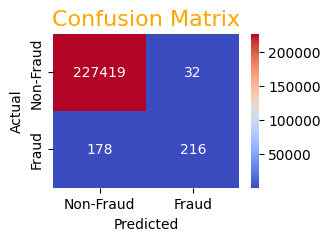


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.57      0.68        98

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.9990871107053826

ROC AUC Score for Test Set: 0.9802270795769068

Confusion Matrix for Test Set:


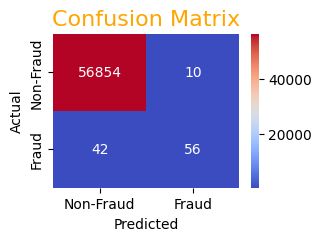

In [9]:
LR_model(vars['x_train_lda'], vars['x_test_lda'], vars['y_train'], vars['y_test'])

# Model Performance With Cross Validation

In [10]:
cross_val(vars['x'], vars['y'])

Fold 1: ROC AUC: 0.97653477603533, F1 Score: 0.6871165644171778, Accuracy: 0.9991046662687406
Fold 2: ROC AUC: 0.9823302046012772, F1 Score: 0.7126436781609197, Accuracy: 0.9991222218320986
Fold 3: ROC AUC: 0.9788584234143862, F1 Score: 0.703030303030303, Accuracy: 0.9991397622934991
Fold 4: ROC AUC: 0.9650886645919822, F1 Score: 0.7590361445783133, Accuracy: 0.9992977651375503
Fold 5: ROC AUC: 0.9646192226428936, F1 Score: 0.7657142857142857, Accuracy: 0.999280209265989

Mean ROC AUC: 0.9734862582571738
Mean F1 Score: 0.7255081951801998
Mean Accuracy: 0.9991889249595756


# Model Performance After Implementing SMOTE

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    284315
           1       0.97      0.92      0.94    284315

    accuracy                           0.95    568630
   macro avg       0.95      0.95      0.95    568630
weighted avg       0.95      0.95      0.95    568630

Accuracy Score for Training Set: 0.9463869299896241

ROC AUC Score for Training Set: 0.9891400897542126

Confusion Matrix for Training Set:



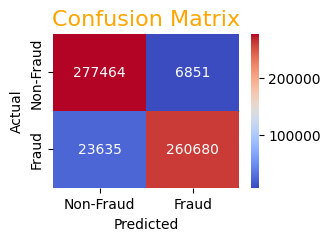


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy Score for Test Set: 0.9755977669323409

ROC AUC Score for Test Set: 0.987368088414319

Confusion Matrix for Test Set:


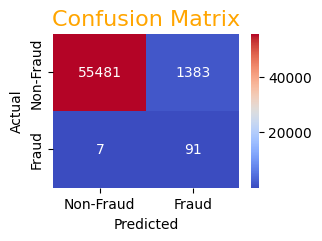

In [11]:
LR_model(vars['x_smote'], vars['x_test'], vars['y_smote'], vars['y_test'])

# Model Performance After Implementing ADASYN

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       0.86      0.91      0.89    284315
           1       0.90      0.86      0.88    284319

    accuracy                           0.88    568634
   macro avg       0.88      0.88      0.88    568634
weighted avg       0.88      0.88      0.88    568634

Accuracy Score for Training Set: 0.8834804109497497

ROC AUC Score for Training Set: 0.9600430568207513

Confusion Matrix for Training Set:



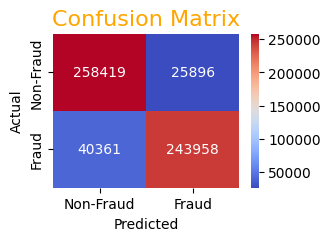


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

Accuracy Score for Test Set: 0.9078859590604262

ROC AUC Score for Test Set: 0.9883739793047213

Confusion Matrix for Test Set:


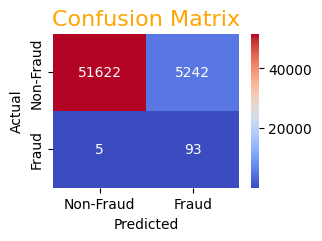

In [12]:
LR_model(vars['x_adasyn'], vars['x_test'], vars['y_adasyn'], vars['y_test'])